Enter xmin (press Enter for 0.0):  -5.74
Enter xmax (press Enter for 9.4):  24.48
Enter ymin (press Enter for -20):  -39.87
Enter ymax (press Enter for 50):  78.5
Use a background image? (y/n):  y
Enter image filename (e.g., background.png):  lid_no_cyz.png



Enter the real-world bounds the image should occupy:


Image xmin (press Enter for -5.74):  
Image xmax (press Enter for 24.48):  
Image ymin (press Enter for -39.87):  78.5
Image ymax (press Enter for 78.5):  -39.87
Label each data point with its intensity value? (y/n):  y


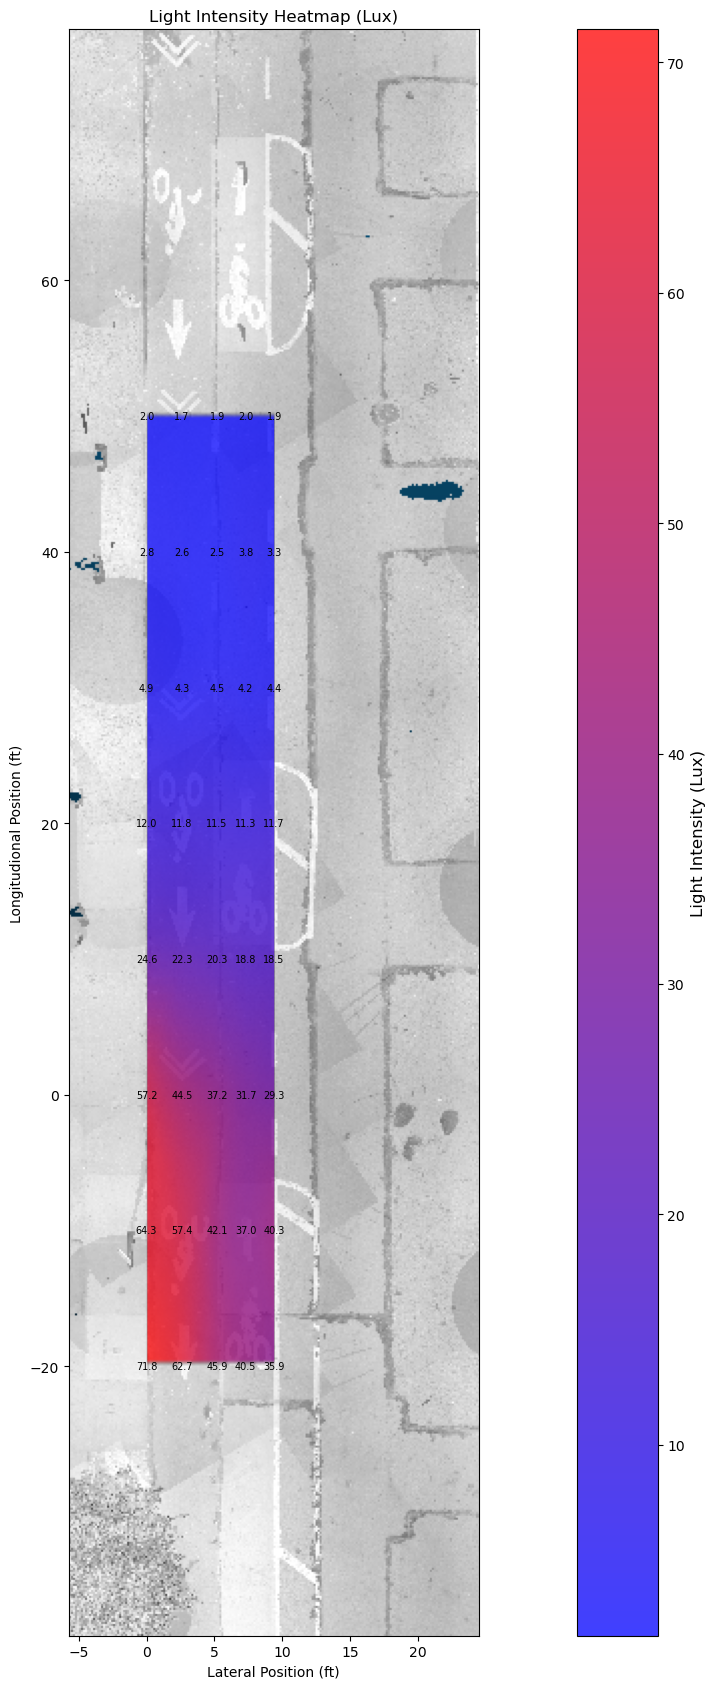

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg

# -----------------------------
# USER‑ADJUSTABLE SETTINGS
# -----------------------------
FIG_WIDTH = 20
FIG_HEIGHT = 17
# -----------------------------

# Load CSV
df = pd.read_csv("xyz.csv")

# Extract columns by position
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values

# --- User Input for Plot Bounds ---
def get_bound(prompt_text, default_value):
    user_input = input(f"{prompt_text} (press Enter for {default_value}): ")
    return float(user_input) if user_input.strip() else default_value

xmin = get_bound("Enter xmin", x.min())
xmax = get_bound("Enter xmax", x.max())
ymin = get_bound("Enter ymin", y.min())
ymax = get_bound("Enter ymax", y.max())

# --- Optional background image ---
use_bg = input("Use a background image? (y/n): ").strip().lower() == "y"

if use_bg:
    img_path = input("Enter image filename (e.g., background.png): ").strip()
    bg = mpimg.imread(img_path)

    print("\nEnter the real-world bounds the image should occupy:")
    img_xmin = get_bound("Image xmin", xmin)
    img_xmax = get_bound("Image xmax", xmax)
    img_ymin = get_bound("Image ymin", ymin)
    img_ymax = get_bound("Image ymax", ymax)

# --- Ask user if they want point labels ---
label_choice = input("Label each data point with its intensity value? (y/n): ").strip().lower()
label_points = (label_choice == "y")

# Create grid for heatmap
grid_x, grid_y = np.mgrid[
    xmin:xmax:200j,
    ymin:ymax:200j
]

grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Custom blue → red colormap
colors = ["blue", "purple", "red"]
cmap = LinearSegmentedColormap.from_list("blue_red_only", colors)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Draw background image first
if use_bg:
    plt.imshow(
        bg,
        extent=(img_xmin, img_xmax, img_ymin, img_ymax),
        origin='lower',
        alpha=1.0
    )

# Draw heatmap
plt.imshow(
    grid_z.T,
    extent=(xmin, xmax, ymin, ymax),
    origin='lower',
    cmap=cmap,
    alpha=0.75
)

# Colorbar
cbar = plt.colorbar()
cbar.set_label("Light Intensity (Lux)", fontsize=12)

plt.xlabel("Lateral Position (ft)")
plt.ylabel("Longitudional Position (ft)")
plt.title("Light Intensity Heatmap (Lux)")

# Optional labels
if label_points:
    for xi, yi, zi in zip(x, y, z):
        plt.text(xi, yi, f"{zi:.1f}", color="black", fontsize=7,
                 ha="center", va="center")

plt.tight_layout()
plt.show()